In [ ]:
!pip install pefile
!pip install requests beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import requests
from bs4 import BeautifulSoup

# Create a new directory to store the zip files
os.makedirs('zip_samples', exist_ok=True)

# Iterate through the number of botnets (1 to 10)
for i in range(1, 10):
  # Send a GET request to the website and parse the HTML content
  url = f'https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-{i}'
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  # Find all the 'a' tags that contain a zip file link
  zip_tags = soup.find_all('a', href=lambda x: x and x.endswith('.zip'))

  # Iterate through the list of zip tags and download the zip files
  for zip_tag in zip_tags:
    zip_url = url + '/' + zip_tag['href']
    response = requests.get(zip_url)
    open(f'zip_samples/{zip_tag["href"]}', 'wb').write(response.content)


In [ ]:
import glob
import csv

# Find all the zip files in the 'zip_samples' folder
zip_files = glob.glob('zip_samples/*.zip')

# Open a new .csv file and write the names of the zip files to it
with open('zip_file_names.csv', 'w', newline='') as csv_file:
  csv_writer = csv.writer(csv_file)
  csv_writer.writerow(['Filename'])
  for zip_file in zip_files:
    csv_writer.writerow([zip_file])

In [ ]:
import csv
import glob
import os
import zipfile

# Open the .csv file and read the zip file names
zip_file_names = []
with open('zip_file_names.csv', 'r') as csv_file:
  csv_reader = csv.reader(csv_file)
  next(csv_reader)  # Skip the header row
  for row in csv_reader:
    zip_file_names.append(row[0])

# Create a new directory to store the extracted files
os.makedirs('exe_samples', exist_ok=True)

# Iterate through the list of zip file names and extract the zip files
for zip_file_name in zip_file_names:
  zip_file = f'{zip_file_name}'
  # Open the zip file and provide the password
  zip_ref = zipfile.ZipFile(zip_file, 'r')
  # Extract the contents of the zip file to the 'exe_samples' folder
  zip_ref.extractall('exe_samples', pwd=b'infected')
  zip_ref.close()


In [ ]:
import glob
import csv

# Find all the exe files in the 'exe_samples' folder
exe_files = glob.glob('exe_samples/*.exe')

# Open a new .csv file and write the names of the exe files to it
with open('exe_file_names.csv', 'w', newline='') as csv_file:
  csv_writer = csv.writer(csv_file)
  csv_writer.writerow(['Filename'])
  for exe_file in exe_files:
    csv_writer.writerow([exe_file])

In [ ]:
import csv
import glob
import os
import pandas as pd
import pefile

# Open the .csv file and read the exe file names
exe_file_names = []
with open('exe_file_names.csv', 'r') as csv_file:
  csv_reader = csv.reader(csv_file)
  next(csv_reader)  # Skip the header row
  for row in csv_reader:
    exe_file_names.append(row[0])

# Create a new DataFrame to store the extracted features
df = pd.DataFrame(columns=['Filename', 'Machine type', 'Number of sections'])

# Iterate over the EXE file names
for exe_file_name in exe_file_names:
  try:
    # Open the EXE file and extract the header information and section sizes
    pe = pefile.PE(exe_file_name)
    data = {'Filename': os.path.basename(exe_file_name), 'Machine type': pe.FILE_HEADER.Machine, 'Number of sections': pe.FILE_HEADER.NumberOfSections}
    for section in pe.sections:
      data[section.Name.decode()] = section.SizeOfRawData
    print(data)

    
  except UnicodeDecodeError:
    print("Corrupted .exe")
    print(exe_file_name)


{'Filename': 'SecureMessage.exe', 'Machine type': 332, 'Number of sections': 6, '.text\x00\x00\x00': 2560, '.rdata\x00\x00': 1536, '.data\x00\x00\x00': 512, '.rich\x00\x00\x00': 1536, '.data1\x00\x00': 512, '.rsrc\x00\x00\x00': 112128}
{'Filename': '39UvZmv.exe', 'Machine type': 332, 'Number of sections': 4, '.text\x00\x00\x00': 2048, '.rdata\x00\x00': 3072, '.orpc\x00\x00\x00': 305664, '.adata\x00\x00': 0}
{'Filename': '3ab45z.exe', 'Machine type': 332, 'Number of sections': 5, '.text\x00\x00\x00': 3072, '.rdata\x00\x00': 1024, '.data\x00\x00\x00': 10752, '.data0\x00\x00': 303104, '.rsrc\x00\x00\x00': 19456}
{'Filename': '1_Jeu_Par_Jour.exe', 'Machine type': 332, 'Number of sections': 4, '.text\x00\x00\x00': 512, '.rdata\x00\x00': 1024, '.data\x00\x00\x00': 512, '.rsrc\x00\x00\x00': 221184}
{'Filename': '76f6ec1ee2c62f2e768477e3d80e3b2c.exe', 'Machine type': 332, 'Number of sections': 4, '.text\x00\x00\x00': 2048, '.rdata\x00\x00': 3584, '.orpc\x00\x00\x00': 305664, '.adata\x00\x00': 

In [ ]:
import csv
import glob
import os
import pandas as pd
import pefile

# Open the .csv file and read the exe file names
exe_file_names = []
with open('exe_file_names.csv', 'r') as csv_file:
  csv_reader = csv.reader(csv_file)
  next(csv_reader)  # Skip the header row
  for row in csv_reader:
    exe_file_names.append(row[0])

# Create a new DataFrame to store the extracted features
df = pd.DataFrame(columns=['Filename', 'Machine type', 'Number of sections'])

# Iterate over the EXE file names
for exe_file_name in exe_file_names:
  try:
    # Open the EXE file and extract the header information and section sizes
    pe = pefile.PE(exe_file_name)
    data = {'Filename': os.path.basename(exe_file_name), 'Machine type': pe.FILE_HEADER.Machine, 'Number of sections': pe.FILE_HEADER.NumberOfSections}
    for section in pe.sections:
      data[section.Name.decode()] = section.SizeOfRawData
    df = df.append(data, ignore_index=True)
    
  except UnicodeDecodeError:
    print("Corrupted .exe")
    print(exe_file_name)

# Write the DataFrame to a CSV file
df.to_csv('extracted_data.csv', index=False)


<ipython-input-8-4c25144dbf7b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
<ipython-input-8-4c25144dbf7b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
<ipython-input-8-4c25144dbf7b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
<ipython-input-8-4c25144dbf7b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
<ipython-input-8-4c25144dbf7b>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

##Analysing The sections of corrupted and uncorrupted files

In [ ]:
import csv
import glob
import os
import zipfile

In [ ]:
import pandas as pd

# Read the CSV files
corrupted_df = pd.read_csv('sample_data/corrupted_files.csv')
not_corrupted_df = pd.read_csv('sample_data/uncorrupted_files.csv')

# Merge the DataFrames on the Filename column
merged_df = pd.merge(corrupted_df, not_corrupted_df, on='Filename', how='outer', suffixes=('_corrupted', '_not_corrupted'))

# Count the number of corrupted and not corrupted files
num_corrupted = merged_df['Machine type_corrupted'].count()
num_not_corrupted = merged_df['Machine type_not_corrupted'].count()

# Calculate the percentage of corrupted files
percent_corrupted = num_corrupted / (num_corrupted + num_not_corrupted) * 100

# Calculate the average number of sections for corrupted and not corrupted files
avg_sections_corrupted = merged_df['Number of sections_corrupted'].mean()
avg_sections_not_corrupted = merged_df['Number of sections_not_corrupted'].mean()

# Print the results
print(f"Total number of files: {num_corrupted + num_not_corrupted}")
print(f"Number of corrupted files: {num_corrupted}")
print(f"Number of not corrupted files: {num_not_corrupted}")
print(f"Percentage of corrupted files: {percent_corrupted:.2f}%")
print(f"Average number of sections for corrupted files: {avg_sections_corrupted:.2f}")
print(f"Average number of sections for not corrupted files: {avg_sections_not_corrupted:.2f}")


Total number of files: 63
Number of corrupted files: 38
Number of not corrupted files: 25
Percentage of corrupted files: 60.32%
Average number of sections for corrupted files: 4.55
Average number of sections for not corrupted files: 7.20


##Check Unique Section Name in uncorrupted files

In [ ]:
filename = 'sample_data/uncorrupted_files.csv'

sec = set()

with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        sections = []
        for key, value in row.items():
            if value and key not in ['Filename', 'Machine type']:
                sec.add(key)
                sections.append(key)
        # print(f"Sections for {row['Filename']}: {', '.join(sections)}")
        
print(sec)



{'.gentee', '.didata', '.rdata', 'Number of sections', 'UPX1', '.rsrc', '/57', '.bss', 'UPX0', '.tls', '.data', '.itext', '.pdata', '/45', '.reloc', '.idata', '.edata', '.wixburn', '.ndata', '/19', '_RDATA', '.text', '.xdata', '.CRT', '/4', '/31'}


In [ ]:
import csv
import pefile

filename = 'sample_data/uncorrupted_files.csv'

# Store all the unique sections from the uncorrupted files
unique_sections = set()
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for key, value in row.items():
            if value and key not in ['Filename', 'Machine type']:
                unique_sections.add(key)

# Extract sections from the given .exe file and check if any different section is present
exe_file = 'sample_data/ScreenRec_webinstall_all.exe'
pe = pefile.PE(exe_file)
exe_sections = set([section.Name.decode().rstrip('\x00') for section in pe.sections])
different_sections = exe_sections - unique_sections

if different_sections:
    print(f"The file {exe_file} is corrupted. Different sections found: {', '.join(different_sections)}")
else:
    print(f"The file {exe_file} is not corrupted.")


The file sample_data/ScreenRec_webinstall_all.exe is not corrupted.


In [ ]:
import pefile

def check_file(filename):
    # Load the PE file
    pe = pefile.PE(filename)

    # Check the conditions
    is_corrupted = 0
    total_check = 8

    # num_sections<=4
    if pe.FILE_HEADER.NumberOfSections <= 4:
        is_corrupted = is_corrupted + 1
        print("Number of sections is less than or equal to 4. File is corrupted.")

    # .sdata
    if ".sdata" in [section.Name.decode().strip('\x00') for section in pe.sections]:
        is_corrupted = is_corrupted + 1
        print("'.sdata' section found. File is corrupted.")

    # .data==0 or NULL
    if not pe.sections[0].Misc_VirtualSize and pe.sections[0].SizeOfRawData == 0:
        is_corrupted = is_corrupted + 1
        print("'.data' section is empty. File is corrupted.")

    # .rdata==0 or NULL
    if not pe.sections[1].Misc_VirtualSize and pe.sections[1].SizeOfRawData == 0:
        is_corrupted = is_corrupted + 1
        print("'.rdata' section is empty. File is corrupted.")

    # .rsrc==0 or NULL
    if not pe.sections[2].Misc_VirtualSize and pe.sections[2].SizeOfRawData == 0:
        is_corrupted = is_corrupted + 1
        print("'.rsrc' section is empty. File is corrupted.")

    # .reloc < .data
    # if pe.sections[5].PointerToRawData < pe.sections[0].PointerToRawData:
    #     is_corrupted = is_corrupted + 1
    #     print("'.reloc' section is located before '.data' section. File is corrupted.")

    # .orpc
    if ".orpc" in [section.Name.decode().strip('\x00') for section in pe.sections]:
        is_corrupted = is_corrupted + 1
        print("'.orpc' section found. File is corrupted.")

    # Check for sections
    exe_sections = set([section.Name.decode().rstrip('\x00') for section in pe.sections])
    different_sections = exe_sections - unique_sections
    if different_sections:
        is_corrupted = is_corrupted + 1

    print("Probability of file being corrupted is", is_corrupted / total_check)


In [ ]:
check1 = "sample_data/39UvZmv.exe"
check2 = "sample_data/FzPfH6.exe"
check3 = "sample_data/ZtaXE.exe"
check4 = "sample_data/ScreenRec_webinstall_all.exe"

check_file(check1)
check_file(check2)
check_file(check3)
check_file(check4)

Number of sections is less than or equal to 4. File is corrupted.
'.orpc' section found. File is corrupted.
Probability of file being corrupted is 0.375
Probability of file being corrupted is 0.125
Number of sections is less than or equal to 4. File is corrupted.
Probability of file being corrupted is 0.125
Probability of file being corrupted is 0.0


##**VISUALIZATION** 

Corrupted avg section size: 94093.450877193
Not corrupted avg section size: 3104922.331428571


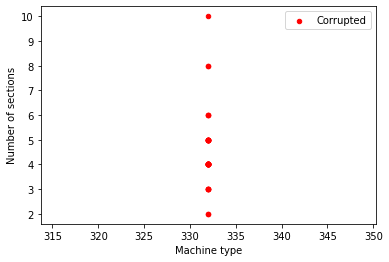

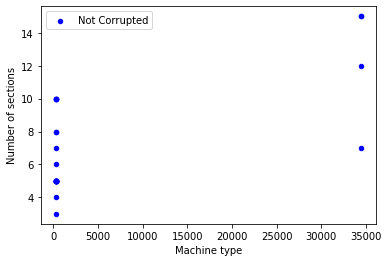

In [ ]:
import pandas as pd

# Load the CSV files
corrupted_df = pd.read_csv('sample_data/corrupted_files.csv')
not_corrupted_df = pd.read_csv('sample_data/uncorrupted_files.csv')

# Merge the two DataFrames
merged_df = pd.concat([corrupted_df, not_corrupted_df])

# Group by Machine type and count the number of files in each group
machine_type_counts = merged_df.groupby('Machine type').size()

# Plot Number of sections vs Machine type for both the corrupted and not corrupted files
corrupted_df.plot(kind='scatter', x='Machine type', y='Number of sections', color='red', label='Corrupted')
not_corrupted_df.plot(kind='scatter', x='Machine type', y='Number of sections', color='blue', label='Not Corrupted')

# Calculate the average section size for both the corrupted and not corrupted files
corrupted_avg_section_size = corrupted_df.iloc[:, 3:].mean(axis=1).mean()
not_corrupted_avg_section_size = not_corrupted_df.iloc[:, 3:].mean(axis=1).mean()

# Print the average section sizes
print('Corrupted avg section size:', corrupted_avg_section_size)
print('Not corrupted avg section size:', not_corrupted_avg_section_size)


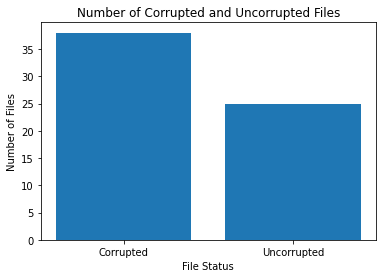

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV files
corrupted_df = pd.read_csv('sample_data/corrupted_files.csv')
not_corrupted_df = pd.read_csv('sample_data/uncorrupted_files.csv')

# Merge the DataFrames on the Filename column
merged_df = pd.merge(corrupted_df, not_corrupted_df, on='Filename', how='outer', suffixes=('_corrupted', '_not_corrupted'))

# Count the number of corrupted and not corrupted files
num_corrupted = merged_df['Machine type_corrupted'].count()
num_not_corrupted = merged_df['Machine type_not_corrupted'].count()

# Create a bar chart
plt.bar(['Corrupted', 'Uncorrupted'], [num_corrupted, num_not_corrupted])

# Add a title and axis labels
plt.title('Number of Corrupted and Uncorrupted Files')
plt.xlabel('File Status')
plt.ylabel('Number of Files')

# Display the chart
plt.show()


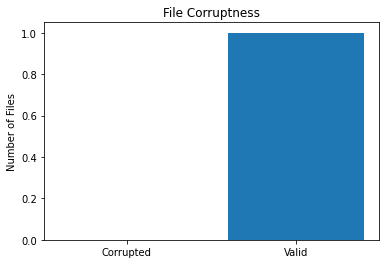

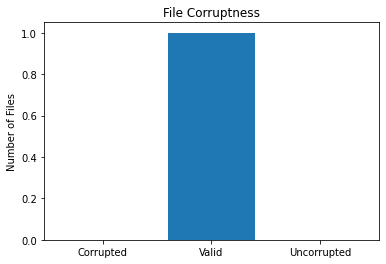

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Corrupted files validity
# read in the file as a pandas dataframe
data = pd.read_csv('sample_data/corrupted_files.csv')

# check for non-null values in a specific column
non_null_values = data['.rdata'].notnull().sum()

# determine if the file is corrupted
is_corrupted = non_null_values == 0

# visualize the number of corrupted files
fig, ax = plt.subplots()
ax.bar(['Corrupted', 'Valid'], [is_corrupted, not is_corrupted])
ax.set_title('File Corruptness')
ax.set_ylabel('Number of Files')
plt.show()

#Uncorrupted files validity
import pandas as pd
import matplotlib.pyplot as plt

# read in the file as a pandas dataframe
data = pd.read_csv('sample_data/uncorrupted_files.csv')

# check for non-null values in a specific column
non_null_values = data['.rdata'].notnull().sum()

# determine if the file is corrupted
is_corrupted = non_null_values == 0

# visualize the number of corrupted and uncorrupted files
fig, ax = plt.subplots()
ax.bar(['Corrupted', 'Valid'], [int(is_corrupted), int(not is_corrupted)])
ax.set_title('File Corruptness')
ax.set_ylabel('Number of Files')

# count the number of uncorrupted files
if not is_corrupted:
    uncorrupted_files = data.shape[0]
    uncorrupted_files -= 1  # exclude the header row
    uncorrupted_files -= non_null_values  # exclude the corrupted rows
    ax.bar(['Uncorrupted'], [uncorrupted_files], color='green')

plt.show()



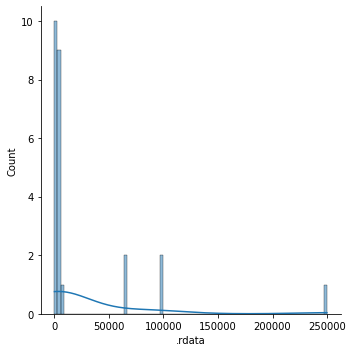

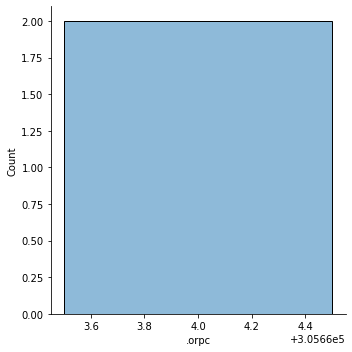

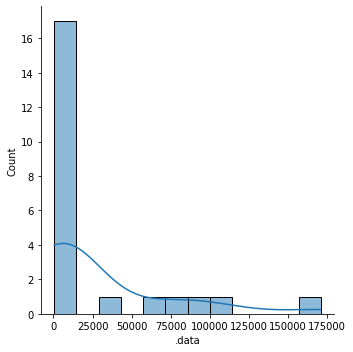

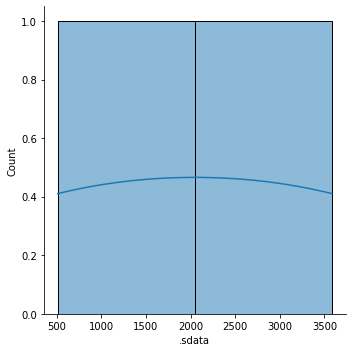

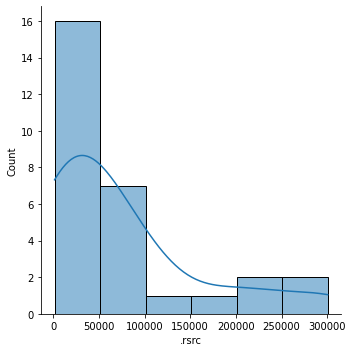

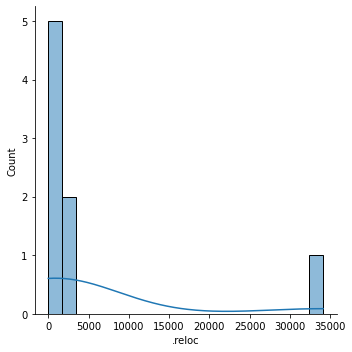

In [ ]:
import pandas as pd
import seaborn as sns
def checkfile(filename):
  sns.displot(df, x=filename, kde=True)
# load the corrupted CSV file
df = pd.read_csv('sample_data/corrupted_files.csv')

# plot the distribution of the malware data using Seaborn
checkfile(".rdata")
checkfile(".orpc")
checkfile(".data")
checkfile(".sdata")
checkfile(".rsrc")
checkfile(".reloc")



/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


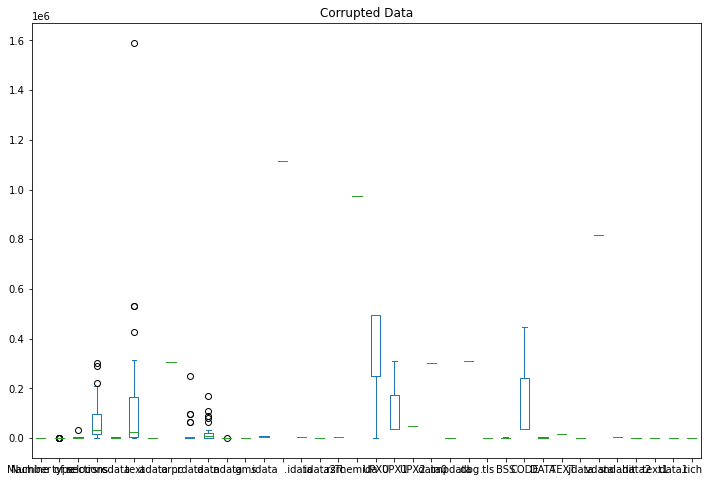

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


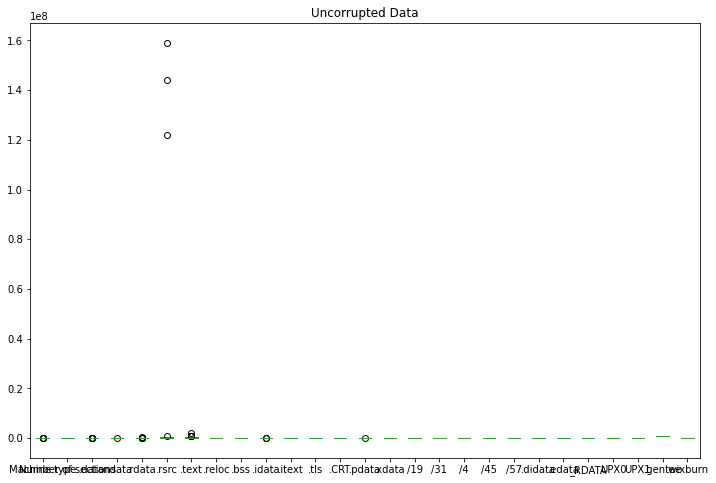

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the malware corrupted CSV file
df = pd.read_csv('sample_data/corrupted_files.csv')

# create a boxplot of all columns
df.plot.box(figsize=(12,8))

# add a title to the plot
plt.title('Corrupted Data')

# display the plot
plt.show()

# load the malware corrupted CSV file
df = pd.read_csv('sample_data/uncorrupted_files.csv')

# create a boxplot of all columns
df.plot.box(figsize=(12,8))

# add a title to the plot
plt.title('Uncorrupted Data')

# display the plot
plt.show()
